# Import data

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
cc_topic_words = pd.read_parquet('./cc_topic_name_df.parquet', engine='pyarrow')
cc_weights = pd.read_parquet('./cc_graph_weights_df.parquet', engine='pyarrow')

In [4]:
nlp_topic_words = pd.read_parquet('./nlp_topic_name_df.parquet', engine='pyarrow')
nlp_weights = pd.read_parquet('./nlp_graph_weights_df.parquet', engine='pyarrow')

# Create and Plot Graph

#### Climate Change Graph

In [5]:
from igraph import *

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
matplotlib.__version__

'3.5.1'

In [7]:
g_cc = Graph()

In [8]:
topic_num = len(cc_topic_words.index)

In [9]:
g_cc.add_vertices(topic_num)

In [10]:
eg_weight_list = []

In [11]:
for i in range(topic_num-1):
    for j in range(i+1,topic_num):
        if cc_weights.iloc[i][j] > 0:
            g_cc.add_edges([(i, j)])
            eg_weight_list.append(cc_weights.iloc[i][j])
g_cc.es['weight'] = eg_weight_list

In [12]:
import igraph as ig

In [13]:
edge_weight_arr = np.array(eg_weight_list)

In [14]:
edge_weight_normalized_arr = edge_weight_arr/edge_weight_arr.max()

In [15]:
edge_weight_normalized = edge_weight_normalized_arr.tolist()

In [16]:
cc_graph_vsize = cc_topic_words['Count']

<AxesSubplot:>

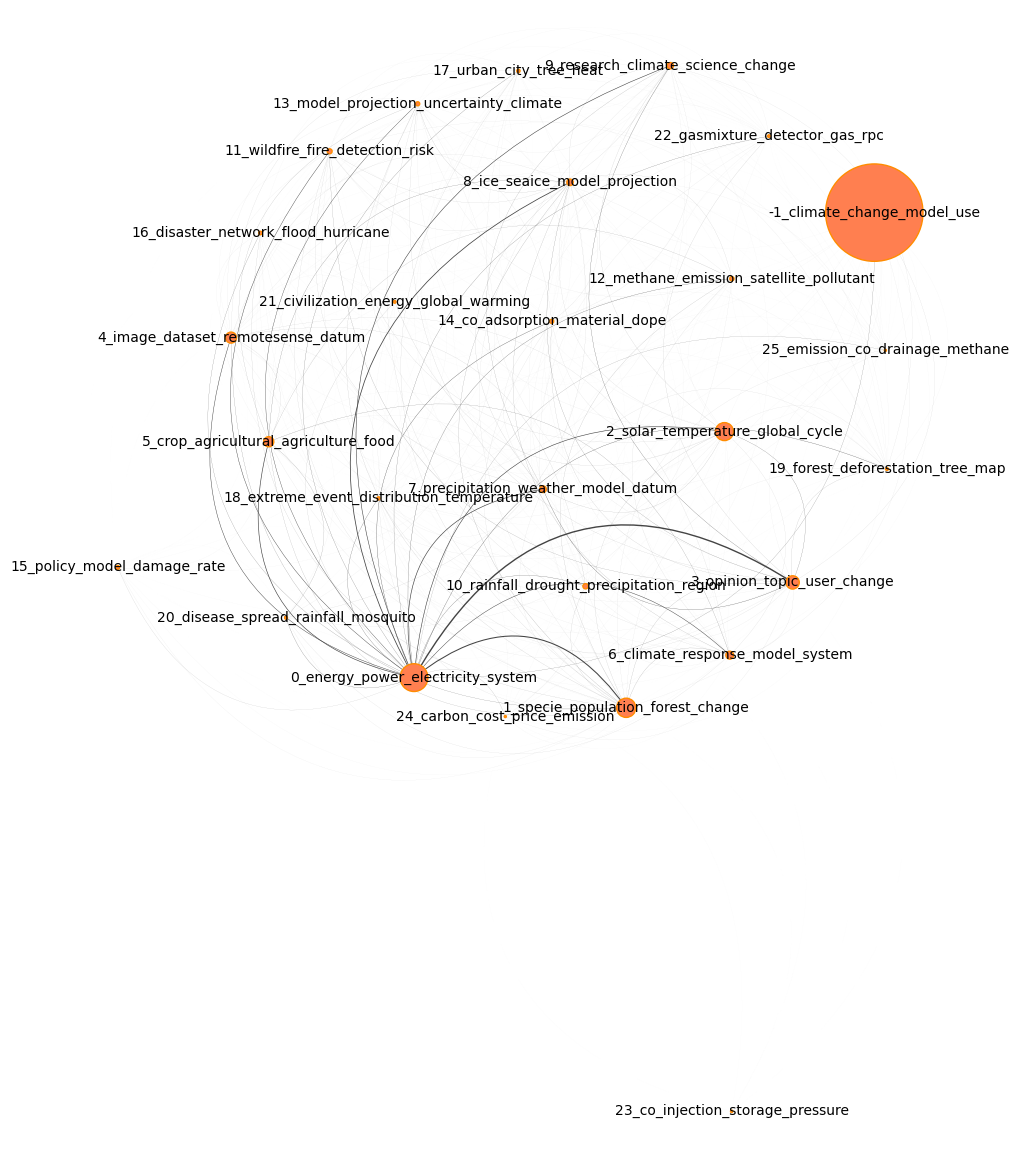

In [17]:
layout = g_cc.layout("kamada_kawai")
g_cc.vs["node_count"] = cc_topic_words['Count']

visual_style = {}
visual_style["edge_width"] = edge_weight_normalized
visual_style["vertex_label"] = cc_topic_words["Name"].tolist()
visual_style["vertex_label_size"] = 10
visual_style["vertex_label_color"] = "purple"
visual_style["vertex_size"] = cc_topic_words['Count']/1000
visual_style["vertex_color"] = "coral"
visual_style["layout"] = layout
fig, ax = plt.subplots(figsize=(15, 15))
ig.plot(g_cc, target=ax, **visual_style, edge_curved=0.7, vertex_frame_color='darkorange')

#### NLP Graph

In [82]:
g_nlp = Graph()

In [83]:
topic_num_nlp = len(nlp_topic_words.index)

In [84]:
g_nlp.add_vertices(topic_num_nlp)

In [85]:
eg_weight_list_nlp = []

In [86]:
for i in range(topic_num_nlp-1):
    for j in range(i+1,topic_num_nlp):
        if nlp_weights.iloc[i][j] > 0:
            g_nlp.add_edges([(i, j)])
            eg_weight_list_nlp.append(nlp_weights.iloc[i][j])
g_nlp.es['weight'] = eg_weight_list_nlp

In [87]:
edge_weight_arr_nlp = np.array(eg_weight_list_nlp)

In [88]:
edge_weight_normalized_arr_nlp = edge_weight_arr_nlp/edge_weight_arr_nlp.max()

In [89]:
edge_weight_normalized_nlp = edge_weight_normalized_arr_nlp.tolist()

In [90]:
nlp_graph_vsize = nlp_topic_words['Count']

<AxesSubplot:>

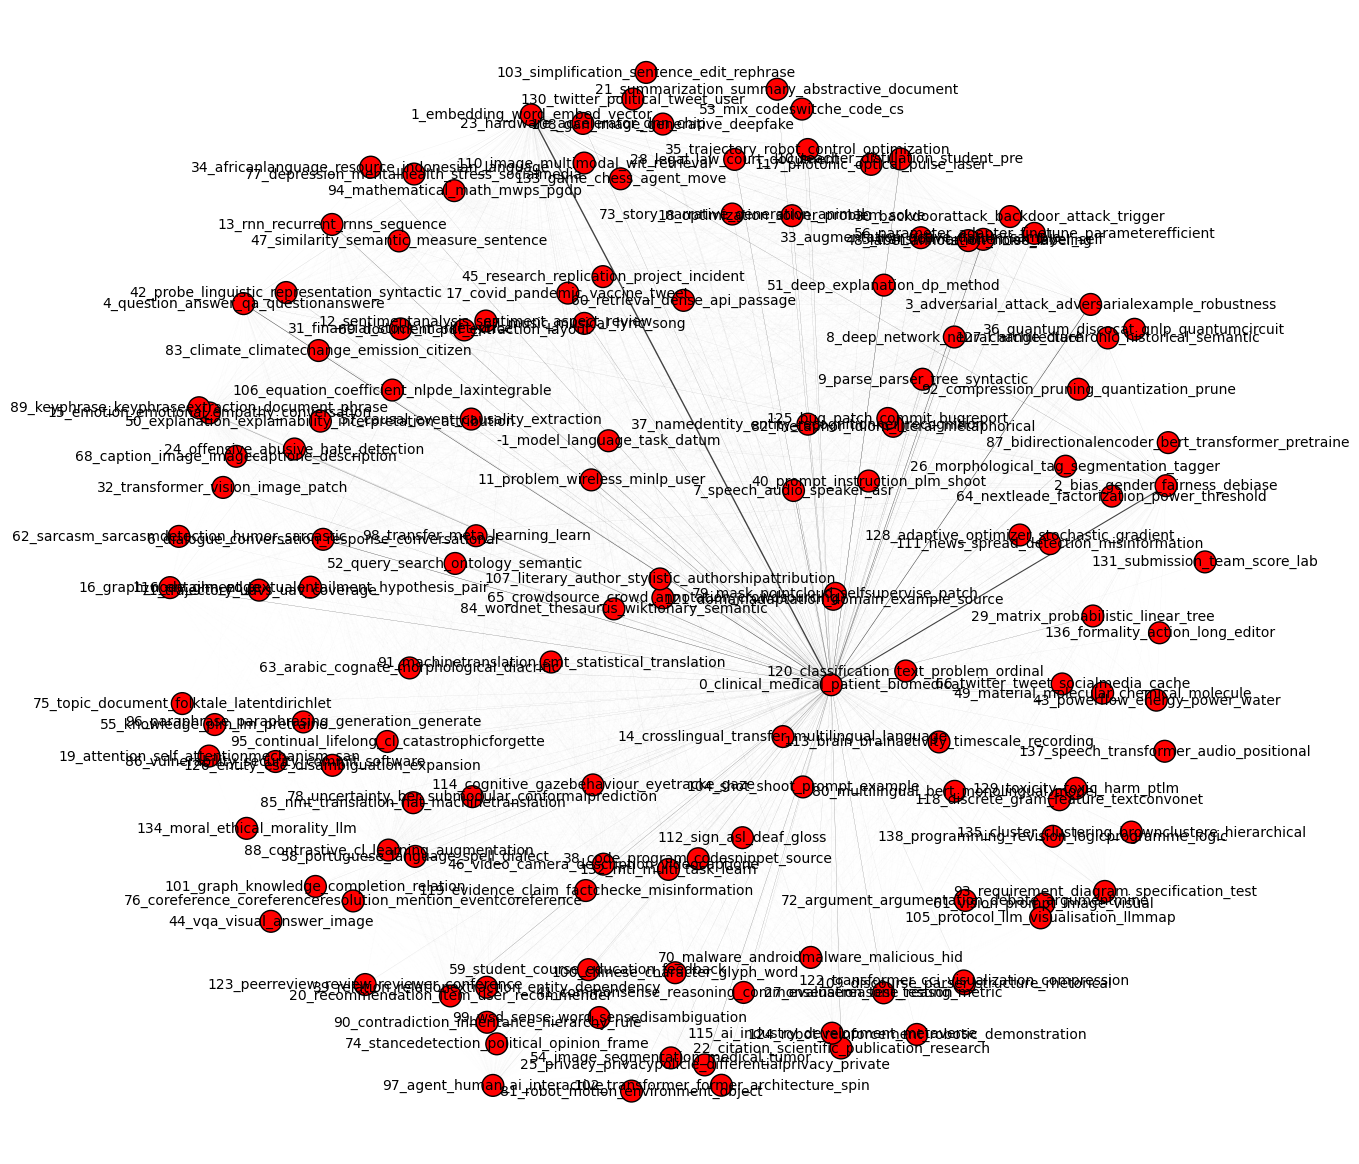

In [91]:
layout = g_nlp.layout("kamada_kawai")

visual_style = {}
visual_style["edge_width"] = edge_weight_normalized_nlp
visual_style["vertex_label"] = nlp_topic_words["Name"].tolist()
visual_style["vertex_label_size"] = 10
visual_style["layout"] = layout
fig, ax = plt.subplots(figsize=(15, 15))
ig.plot(g_nlp, target=ax, **visual_style)

Plot NLP topic graph with the top 100 topics without topic -1

In [250]:
g_nlp1 = Graph()

In [251]:
topic_num_nlp1 = 100

In [252]:
g_nlp1.add_vertices(topic_num_nlp1)

In [253]:
eg_weight_list_nlp1 = []

In [254]:
for i in range(topic_num_nlp1-1):
    for j in range(i+1,topic_num_nlp1):
        if nlp_weights.iloc[i+1][j+1] > 0:
            g_nlp1.add_edges([(i, j)])
            eg_weight_list_nlp1.append(nlp_weights.iloc[i+1][j+1])
g_nlp1.es['weight'] = eg_weight_list_nlp1

In [255]:
edge_weight_arr_nlp1 = np.array(eg_weight_list_nlp1)

In [256]:
edge_weight_normalized_arr_nlp1 = edge_weight_arr_nlp1/edge_weight_arr_nlp1.max()

In [257]:
edge_weight_normalized_nlp1 = edge_weight_normalized_arr_nlp1.tolist()

In [258]:
nlp_graph_vsize1 = nlp_topic_words['Count'][1:101]/1500

In [259]:
nlp_graph_vname1 = nlp_topic_words["Name"].tolist()[1:101]

<AxesSubplot:>

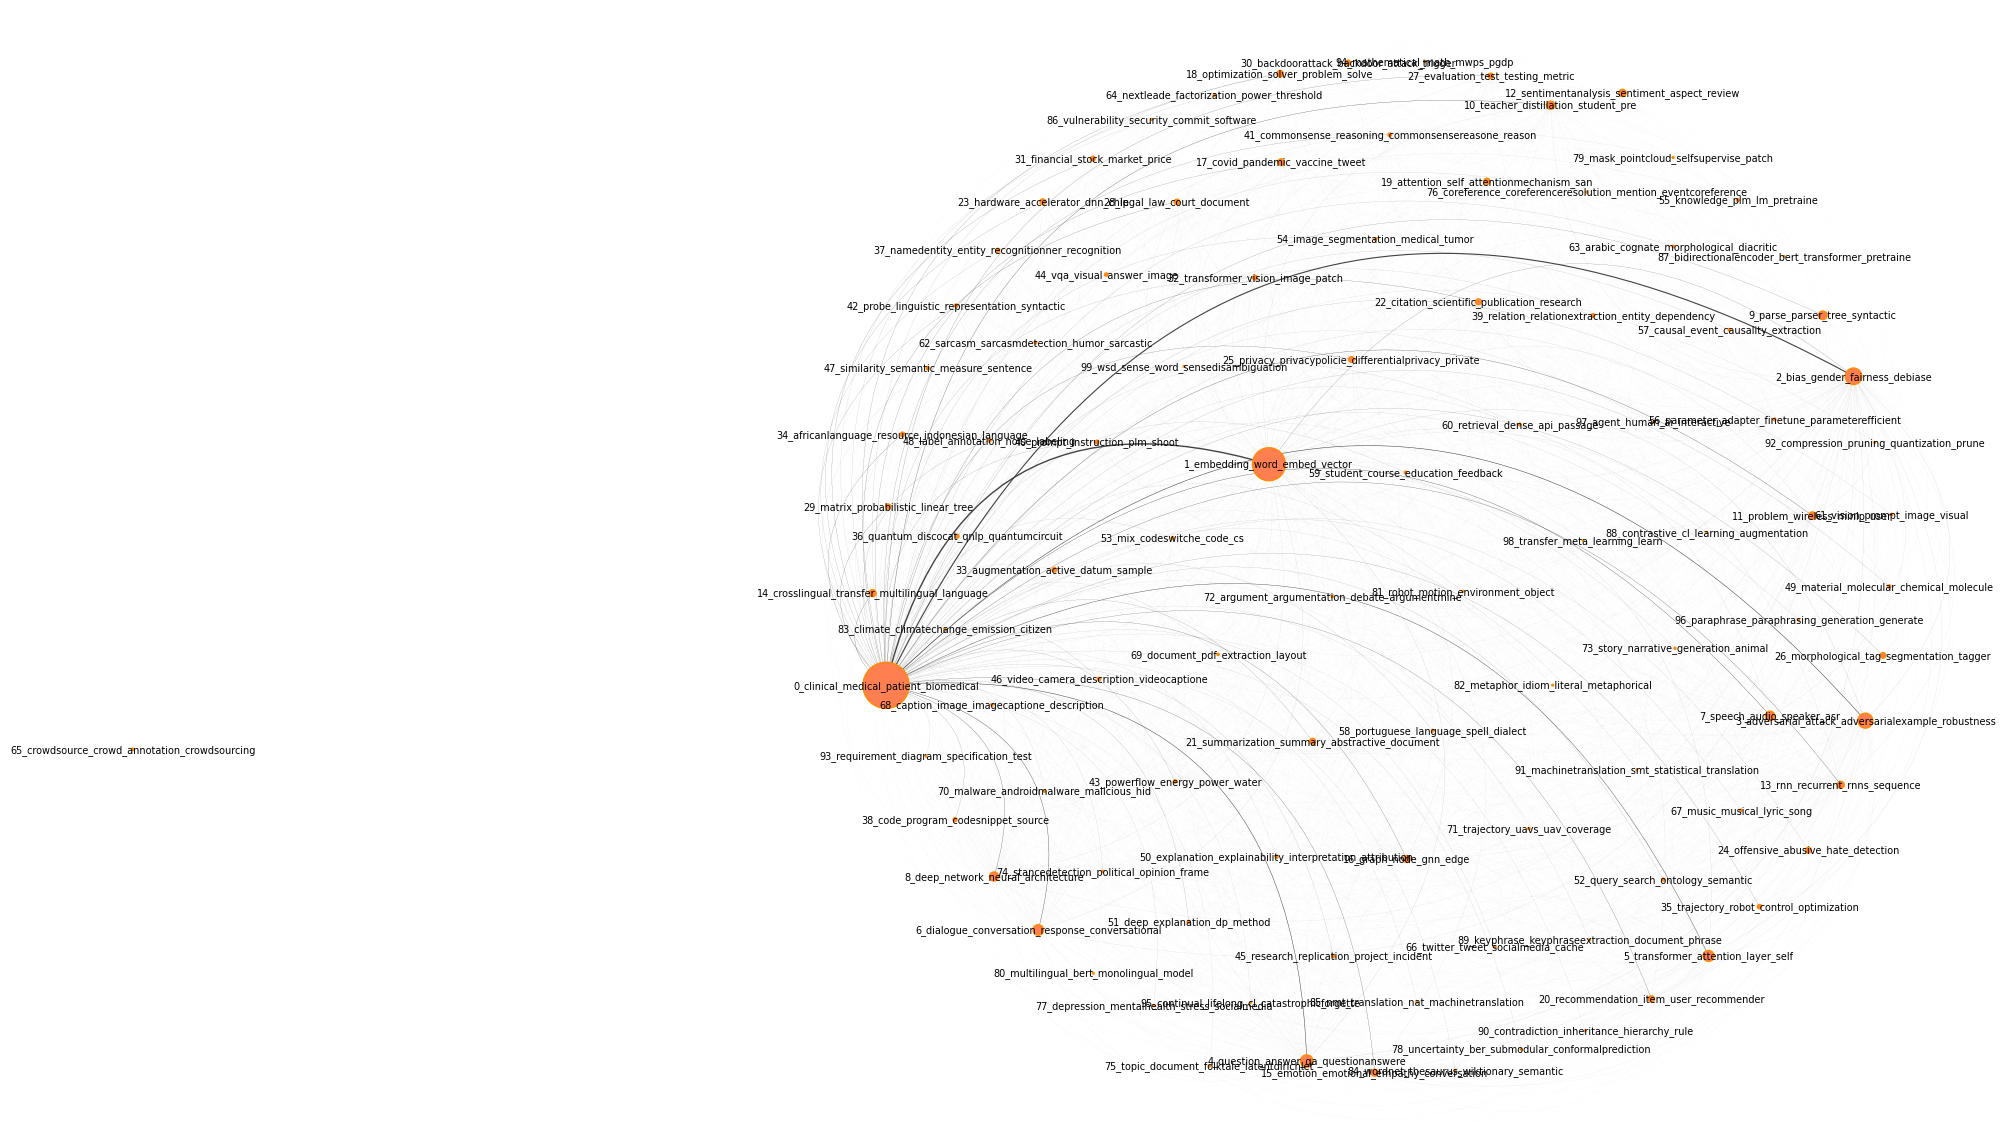

In [260]:
layout = g_nlp1.layout("kamada_kawai")

visual_style = {}
visual_style["edge_width"] = edge_weight_normalized_nlp1
visual_style["vertex_label"] = nlp_graph_vname1
visual_style["vertex_label_size"] = 7
visual_style["vertex_label_color"] = "purple"
visual_style["vertex_size"] = nlp_graph_vsize1
visual_style["vertex_color"] = "coral"
visual_style["layout"] = layout
fig, ax = plt.subplots(figsize=(25, 25))
ig.plot(g_nlp1, target=ax, **visual_style, edge_curved=0.7, vertex_frame_color='darkorange')